In [1]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from numpy import *
import scipy.io as sio
from ex3 import visualize_subset_100, predict
from ex2 import costFunctionReg, costFunctionGradientReg

In [14]:
mat = sio.loadmat('ex4data1.mat')
weights = sio.loadmat('ex4weights.mat')
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

In [20]:
Theta2.shape

(10, 26)

In [22]:
Theta1, Theta2 = [weights['Theta1'], weights['Theta2']]
nn_params = np.r_[Theta1.flatten(), Theta2.flatten()]

# check if it worked:
print (Theta1.shape, Theta2.shape, nn_params.shape)
Theta1_ = nn_params[:hidden_layer_size*(input_layer_size+1)].reshape((hidden_layer_size, input_layer_size+1))
Theta2_ = nn_params[hidden_layer_size*(input_layer_size+1):].reshape((num_labels, hidden_layer_size+1))
all(Theta1 == Theta1_) and all(Theta2==Theta2_)

(25, 401) (10, 26) (10285,)


True

In [52]:
Theta1.shape

(25, 401)

In [54]:
Theta2.shape

(10, 26)

In [55]:
y = mat['y'].T
X = mat['X'].T
m = X.shape[1]
# get rid of confusing 10 instead of 0...
lam = 0 # no regularization for now

<IPython.core.display.Javascript object>


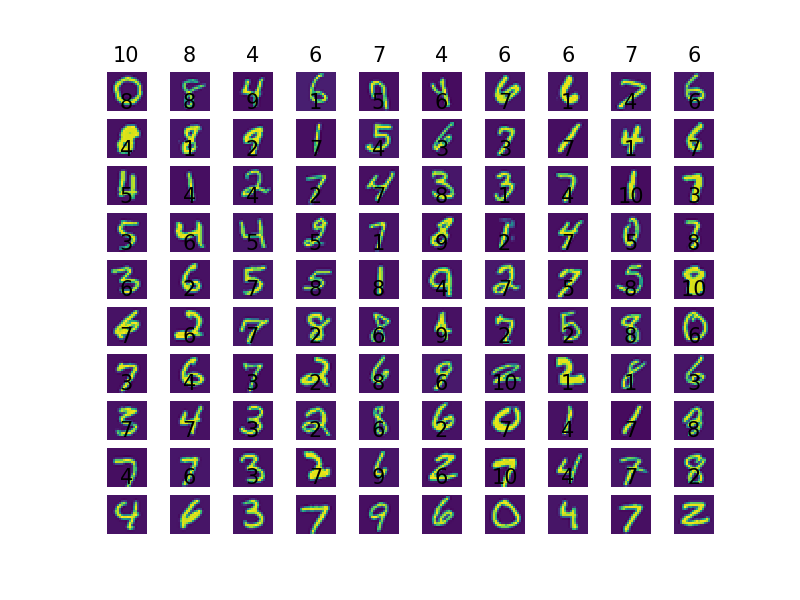

In [56]:
visualize_subset_100(X, y)

In [6]:
input_layer_size, hidden_layer_size, num_labels

(400, 25, 10)

In [78]:
# %load nnCostFunction.m
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lam):
    #NNCOSTFUNCTION Implements the neural network cost function for a two layer
    #neural network which performs classification
    #   [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels, ...
    #   X, y, lambda) computes the cost and gradient of the neural network. The
    #   parameters for the neural network are "unrolled" into the vector
    #   nn_params and need to be converted back into the weight matrices. 
    # 
    #   The returned parameter grad should be a "unrolled" vector of the
    #   partial derivatives of the neural network.
    #

    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    
    Theta1 = nn_params[:hidden_layer_size*(input_layer_size+1)].reshape((hidden_layer_size, input_layer_size+1))
    Theta2 = nn_params[hidden_layer_size*(input_layer_size+1):].reshape((num_labels, hidden_layer_size+1))


    # Setup some useful variables
    m = X.shape[1]

    # You need to return the following variables correctly 
    J = 0
    Theta1_grad = zeros(Theta1.shape)
    Theta2_grad = zeros(Theta2.shape)

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should complete the code by working through the
    #               following parts.
    #
    # Part 1: Feedforward the neural network and return the cost in the
    #         variable J. After implementing Part 1, you can verify that your
    #         cost function computation is correct by verifying the cost
    #         computed in ex4.m
    #
    # Part 2: Implement the backpropagation algorithm to compute the gradients
    #         Theta1_grad and Theta2_grad. You should return the partial derivatives of
    #         the cost function with respect to Theta1 and Theta2 in Theta1_grad and
    #         Theta2_grad, respectively. After implementing Part 2, you can check
    #         that your implementation is correct by running checkNNGradients
    #
    #         Note: The vector y passed into the function is a vector of labels
    #               containing values from 1..K. You need to map this vector into a 
    #               binary vector of 1's and 0's to be used with the neural network
    #               cost function.
    #
    #         Hint: We recommend implementing backpropagation using a for-loop
    #               over the training examples if you are implementing it for the 
    #               first time.
    #
    # Part 3: Implement regularization with the cost function and gradients.
    #
    #         Hint: You can implement this around the code for
    #               backpropagation. That is, you can compute the gradients for
    #               the regularization separately and then add them to Theta1_grad
    #               and Theta2_grad from Part 2.
    #

    # Part 1:
    _y = np.zeros((num_labels, y.shape[1]))
    for nyi, yi in enumerate(y.T):
        _y[yi-1, nyi] = 1
    _J = 0
    for i in range(m):
        hi = h(Theta1, Theta2, X[:,i][:,None])
        yi = _y[:,i][:,None]
        _J += (-yi * log(hi) - (1 - yi) * log(1 - hi))
    J = _J.sum()/m
    
    # Part 2:
    


    # -------------------------------------------------------------

    # =========================================================================

    # Unroll gradients
    grad = np.r_[Theta1_grad.flatten(), Theta2_grad.flatten()].flatten()
    
    return J, grad

In [81]:
J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, lam)


In [150]:
dot(Theta2[:,1:].T, delta3).shape

(25,)

In [161]:
m = X.shape[1]
Delta1 = 0
Delta2 = 0
for i in range(m):
    _X = np.r_[1, X[:,i]]

    a1 = _X
    z2 = dot(Theta1, a1)
    a2 = sigmoid(z2)
    _a2 = np.r_[1, a2]
    z3 = dot(Theta2, _a2)
    a3 = sigmoid(z3)

    _y = np.zeros(num_labels)
    yi = y[:, i]
    _y[yi-1] = 1

    delta3 = a3 - _y

    sgz2 = sigmoidGradient(z2)
    delta2 = dot(Theta2[:,1:].T, delta3) * (sgz2)

    Delta1 += delta2[:,None].dot(a1[:, None].T) #(25,1)x(1,401) = (25,401) (correct)
    Delta2 += delta3[:,None].dot(a2[:,None].T) #(10,1)x(1,25) = (10,25) (should be 10,26)
D1 = Delta1/float(m)
D2 = Delta2/float(m)

In [155]:
a1.shape

(401,)

In [151]:
delta2 = dot(Theta2[:,1:].T, delta3) * (sgz2)


In [125]:
print (Theta2.T.shape, delta3.shape, (Theta2.T * delta3).shape, sgz2.shape)

(26, 10) (10,) (26, 10) (25,)


In [37]:
def h(Theta1, Theta2, X):
    m = X.shape[1]
    _X = np.r_[ones((1, m)), X]

    z2 = dot(Theta1, _X)
    hidden_layer = sigmoid(z2)

    _hidden_layer = np.r_[ones((1, hidden_layer.shape[1])), hidden_layer]
    z3 = dot(Theta2, _hidden_layer)

    output_layer = sigmoid(z3)
    return output_layer

In [104]:
def randInitializeWeights(L_in, L_out):
    #RANDINITIALIZEWEIGHTS Randomly initialize the weights of a layer with L_in
    #incoming connections and L_out outgoing connections
    eps_init = sqrt(6)/(sqrt(L_in + L_out))
    W = (random.random((L_in, L_out))* 2 * eps_init) - eps_init
    return W

In [105]:
def sigmoidGradient(z):
    #SIGMOIDGRADIENT returns the gradient of the sigmoid function
    #evaluated at z.
    return sigmoid(z)*(1-sigmoid(z))

In [6]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

In [7]:
PDF('ex4.pdf',size=(900,500))